*************************************************************
# Data Preprocessing
*************************************************************

1.1 Load the "house-prices.csv" dataset into a Pandas DataFrame:

In [ ]:
import pandas as pd

# Loading the CSV file into a DataFrame
df = pd.read_csv('house_prices.csv')


1.2 Perform data cleaning, including handling missing values, outliers, and duplicates:

In [ ]:
#  check for missing values in the DataFrame
df.isnull().sum()
# Check for and remove duplicate rows using
df.drop_duplicates()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


 1.3 Encode categorical variables using one-hot encoding or label encoding:

In [ ]:
df = pd.get_dummies(df, columns=['Neighborhood', 'Brick'], drop_first=True)
print(df.shape)
print(df.head())
real_data = df.copy()

(128, 9)
   Home   Price  SqFt  Bedrooms  Bathrooms  Offers  Neighborhood_North  \
0     1  114300  1790         2          2       2                   0   
1     2  114200  2030         4          2       3                   0   
2     3  114800  1740         3          2       1                   0   
3     4   94700  1980         3          2       3                   0   
4     5  119800  2130         3          3       3                   0   

   Neighborhood_West  Brick_Yes  
0                  0          0  
1                  0          0  
2                  0          0  
3                  0          0  
4                  0          0  


1.4 Handle numerical features, such as scaling or transformation:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["SqFt", "Bedrooms", "Bathrooms", "Offers"]] = scaler.fit_transform(df[["SqFt", "Bedrooms", "Bathrooms", "Offers"]])


1.5 Split the dataset into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Price", axis=1)  # Features
y = df["Price"]              # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*************************************************************
# Exploratory Data Analysis (EDA)
*************************************************************

2.1 Explore the dataset's structure and statistics:

In [ ]:
# Explore dataset structure
print(df.info())

# Summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Home                128 non-null    int64  
 1   Price               128 non-null    int64  
 2   SqFt                128 non-null    float64
 3   Bedrooms            128 non-null    float64
 4   Bathrooms           128 non-null    float64
 5   Offers              128 non-null    float64
 6   Neighborhood_North  128 non-null    uint8  
 7   Neighborhood_West   128 non-null    uint8  
 8   Brick_Yes           128 non-null    uint8  
dtypes: float64(4), int64(2), uint8(3)
memory usage: 6.5 KB
None
             Home          Price        SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000  128.000000  128.000000  128.000000   
mean    64.500000  130427.343750    0.483279    0.341146    0.222656   
std     37.094474   26868.770371    0.185590    0.241984    0.257246   
min 

2.2 Visualize the distribution of house prices using a histogram:

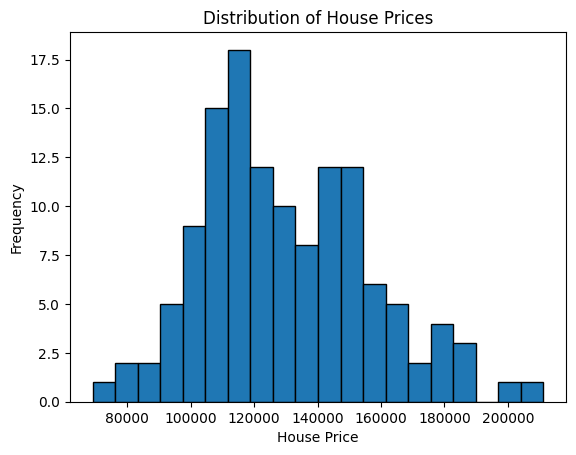

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Price'], bins=20, edgecolor='k')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


2.3 Investigate the relationships between features and house prices:

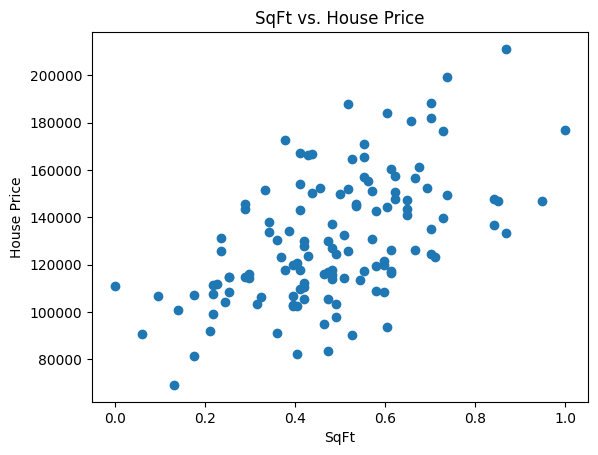

                        Home     Price      SqFt  Bedrooms  Bathrooms  \
Home                1.000000  0.108190  0.168553 -0.068568   0.127694   
Price               0.108190  1.000000  0.552982  0.525926   0.523258   
SqFt                0.168553  0.552982  1.000000  0.483807   0.522745   
Bedrooms           -0.068568  0.525926  0.483807  1.000000   0.414556   
Bathrooms           0.127694  0.523258  0.522745  0.414556   1.000000   
Offers             -0.053597 -0.313636  0.336923  0.114271   0.143793   
Neighborhood_North  0.049859 -0.548221 -0.288886 -0.364667  -0.275830   
Neighborhood_West   0.026873  0.714007  0.250759  0.471477   0.285923   
Brick_Yes           0.037376  0.452817  0.079792  0.046380   0.171977   

                      Offers  Neighborhood_North  Neighborhood_West  Brick_Yes  
Home               -0.053597            0.049859           0.026873   0.037376  
Price              -0.313636           -0.548221           0.714007   0.452817  
SqFt                0.3369

In [ ]:
# Scatter plot for a numerical feature (e.g., SqFt vs. Price)
plt.scatter(df['SqFt'], df['Price'])
plt.xlabel('SqFt')
plt.ylabel('House Price')
plt.title('SqFt vs. House Price')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)


2.4 Identify the most important features that may affect house prices:

In [ ]:
# Sort features by absolute correlation with Price
correlation_with_price = correlation_matrix['Price'].abs().sort_values(ascending=False)
print(correlation_with_price)


Price                 1.000000
Neighborhood_West     0.714007
SqFt                  0.552982
Neighborhood_North    0.548221
Bedrooms              0.525926
Bathrooms             0.523258
Brick_Yes             0.452817
Offers                0.313636
Home                  0.108190
Name: Price, dtype: float64


2.5 Provide insights and observations based on your EDA:

In [ ]:
correlations_with_target = correlation_matrix['Price'].sort_values(ascending=False)
print("Correlations with HousePrice:")
print(correlations_with_target[:])

Correlations with HousePrice:
Price                 1.000000
Neighborhood_West     0.714007
SqFt                  0.552982
Bedrooms              0.525926
Bathrooms             0.523258
Brick_Yes             0.452817
Home                  0.108190
Offers               -0.313636
Neighborhood_North   -0.548221
Name: Price, dtype: float64


*************************************************************
# Model Building
*************************************************************

3.1 Selecting three different machine learning algorithms suitable for regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


3.2 Train and evaluate each model using appropriate evaluation metrics:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Metrics:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")
    print("\n")

Linear Regression Metrics:
Mean Absolute Error: 8858.885607471679
Root Mean Squared Error: 10688.832289699636
R-squared: 0.8061565137761029


Decision Tree Metrics:
Mean Absolute Error: 16734.615384615383
Root Mean Squared Error: 21179.207873616193
R-squared: 0.2389553944552626


Random Forest Metrics:
Mean Absolute Error: 9981.23076923077
Root Mean Squared Error: 13467.03160142747
R-squared: 0.6922950771251375




3.3 Implement hyperparameter tuning for one of the models:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


3.5 Visualize the predictions of the selected model against the actual house prices:

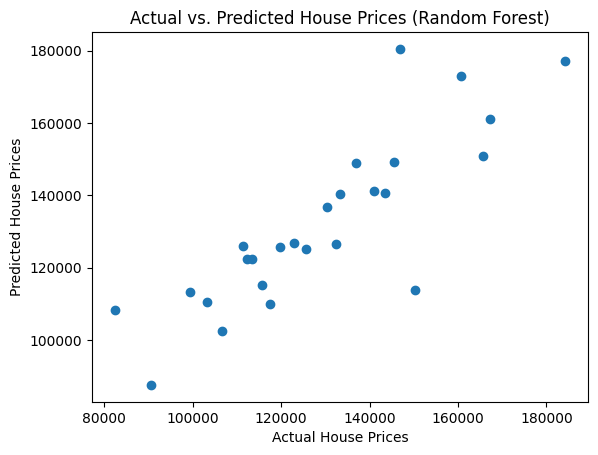

In [ ]:
# Visualize the predictions of the selected model
plt.scatter(y_test, y_pred_best)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices (Random Forest)')
plt.show()


*************************************************************
# Model Interpretability
*************************************************************

4.1 Use model interpretability techniques:
Feature Importance (for Random Forest):



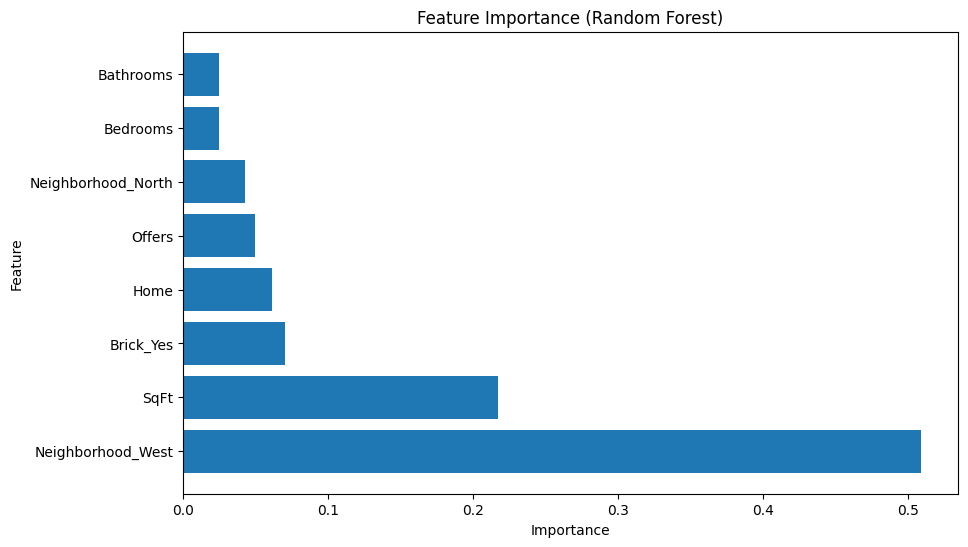

In [ ]:
# Get feature importances from the Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

4.2 observing the above visualisation the insights are that according to the model, features like neighnorhood_west and Sqft have the most impact on the houseprices.